In [144]:
import numpy as np
import pandas as pd

from IPython.display import display
#http://python.6.x6.nabble.com/IPython-User-ipython-notebook-how-to-display-image-not-from-pylab-td4497427.html

# plotting modules
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

pd.set_option('display.max_columns', None)

In [173]:
df='C:/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/boston_housing_data/housing.csv'
df= pd.read_csv(df)

In [174]:

df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
CRIM          506 non-null float64
ZN            506 non-null float64
INDUS         506 non-null float64
CHAS          506 non-null int64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null float64
RAD           506 non-null int64
TAX           506 non-null int64
PTRATIO       506 non-null float64
B             506 non-null float64
LSTAT         506 non-null float64
MEDV          506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [175]:
df.head(2)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [176]:
#REGRESSION TREE
## Define y
y = df['TAX']

## Define X (excluding dependent variable)
columns_ = df.columns.tolist()
exclude_cols = ['TAX' ] 
#TO EXCLUDE SOME VAR FROM THE WHOLE DATA FRAME

X = df[[i for i in columns_ if i not in exclude_cols]] 
#IF THE VAR ARE NOT IN EXCLUDED LIST

## Print shapes of y and X
print y.shape, X.shape


(506L,) (506, 14)


In [177]:
## Train test split 70/30
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Print shapes of X(s) and y
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(303, 14) (303L,)
(203, 14) (203L,)


In [178]:
#Build a regression tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch, and we are asking the computer to go and find the one that gives the best model 
#we specify the parameters we want
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"], #n.b:none will overfit the model
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }


In [179]:
### Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1) 
#NB:njobs=-1 removes the criteria after its already used.


In [180]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()
df.fillna(0, inplace=True)

In [181]:

#Fit the tree model
dtr_gs.fit(X_train, y_train)
#Print best estimator, best parameters, and best score (best fit to explain Y)
''' dtr_best = is the regression tree regressor with best parameters/estimators'''

dtr_best = dtr_gs.best_estimator_ 
print "best estimator", dtr_best
print "\n==========\n"
print "best parameters, inplace=True",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.4s


best estimator DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=7,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters, inplace=True {'max_features': None, 'min_samples_split': 7, 'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 1}


best score 0.947832533088


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.2s finished


In [182]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance


In [183]:
#Using the function
feature_importance(X, dtr_best)


,feature,importance
9,RAD,0.828409
3,INDUS,0.077776
5,NOX,0.043500
2,ZN,0.015760
8,DIS,0.009850
1,CRIM,0.008667
12,LSTAT,0.005866
6,RM,0.003904
11,B,0.003396
0,Unnamed: 0,0.002872


In [184]:
#Predict on the Test Data
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr


array([ 261.        ,  666.        ,  666.        ,  277.        ,
        236.66666667,  403.        ,  391.        ,  398.        ,
        233.        ,  277.8       ,  233.        ,  330.        ,
        666.        ,  391.        ,  666.        ,  307.        ,
        307.        ,  437.        ,  188.        ,  254.        ,
        403.        ,  277.8       ,  403.        ,  666.        ,
        666.        ,  364.33333333,  307.        ,  666.        ,
        391.        ,  307.        ,  300.        ,  666.        ,
        307.        ,  285.        ,  264.        ,  666.        ,
        666.        ,  264.        ,  666.        ,  298.66666667,
        330.        ,  311.        ,  384.        ,  222.6       ,
        292.66666667,  277.        ,  432.        ,  666.        ,
        403.        ,  364.33333333,  666.        ,  307.        ,
        273.25      ,  311.        ,  666.        ,  364.33333333,
        289.        ,  233.        ,  270.        ,  304.     

In [189]:
#Evaluate the performance of your model (MSE in train and test data, R2 in train and test data)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


#Define Function that calls the MSE and R^2 at once, using the name of the method and calling the best model

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))



In [190]:
#Using function
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)


MSE Regression tree train data: 59.65, test data: 1223.85
R^2 Regression tree train data: 1.00, test data: 0.95


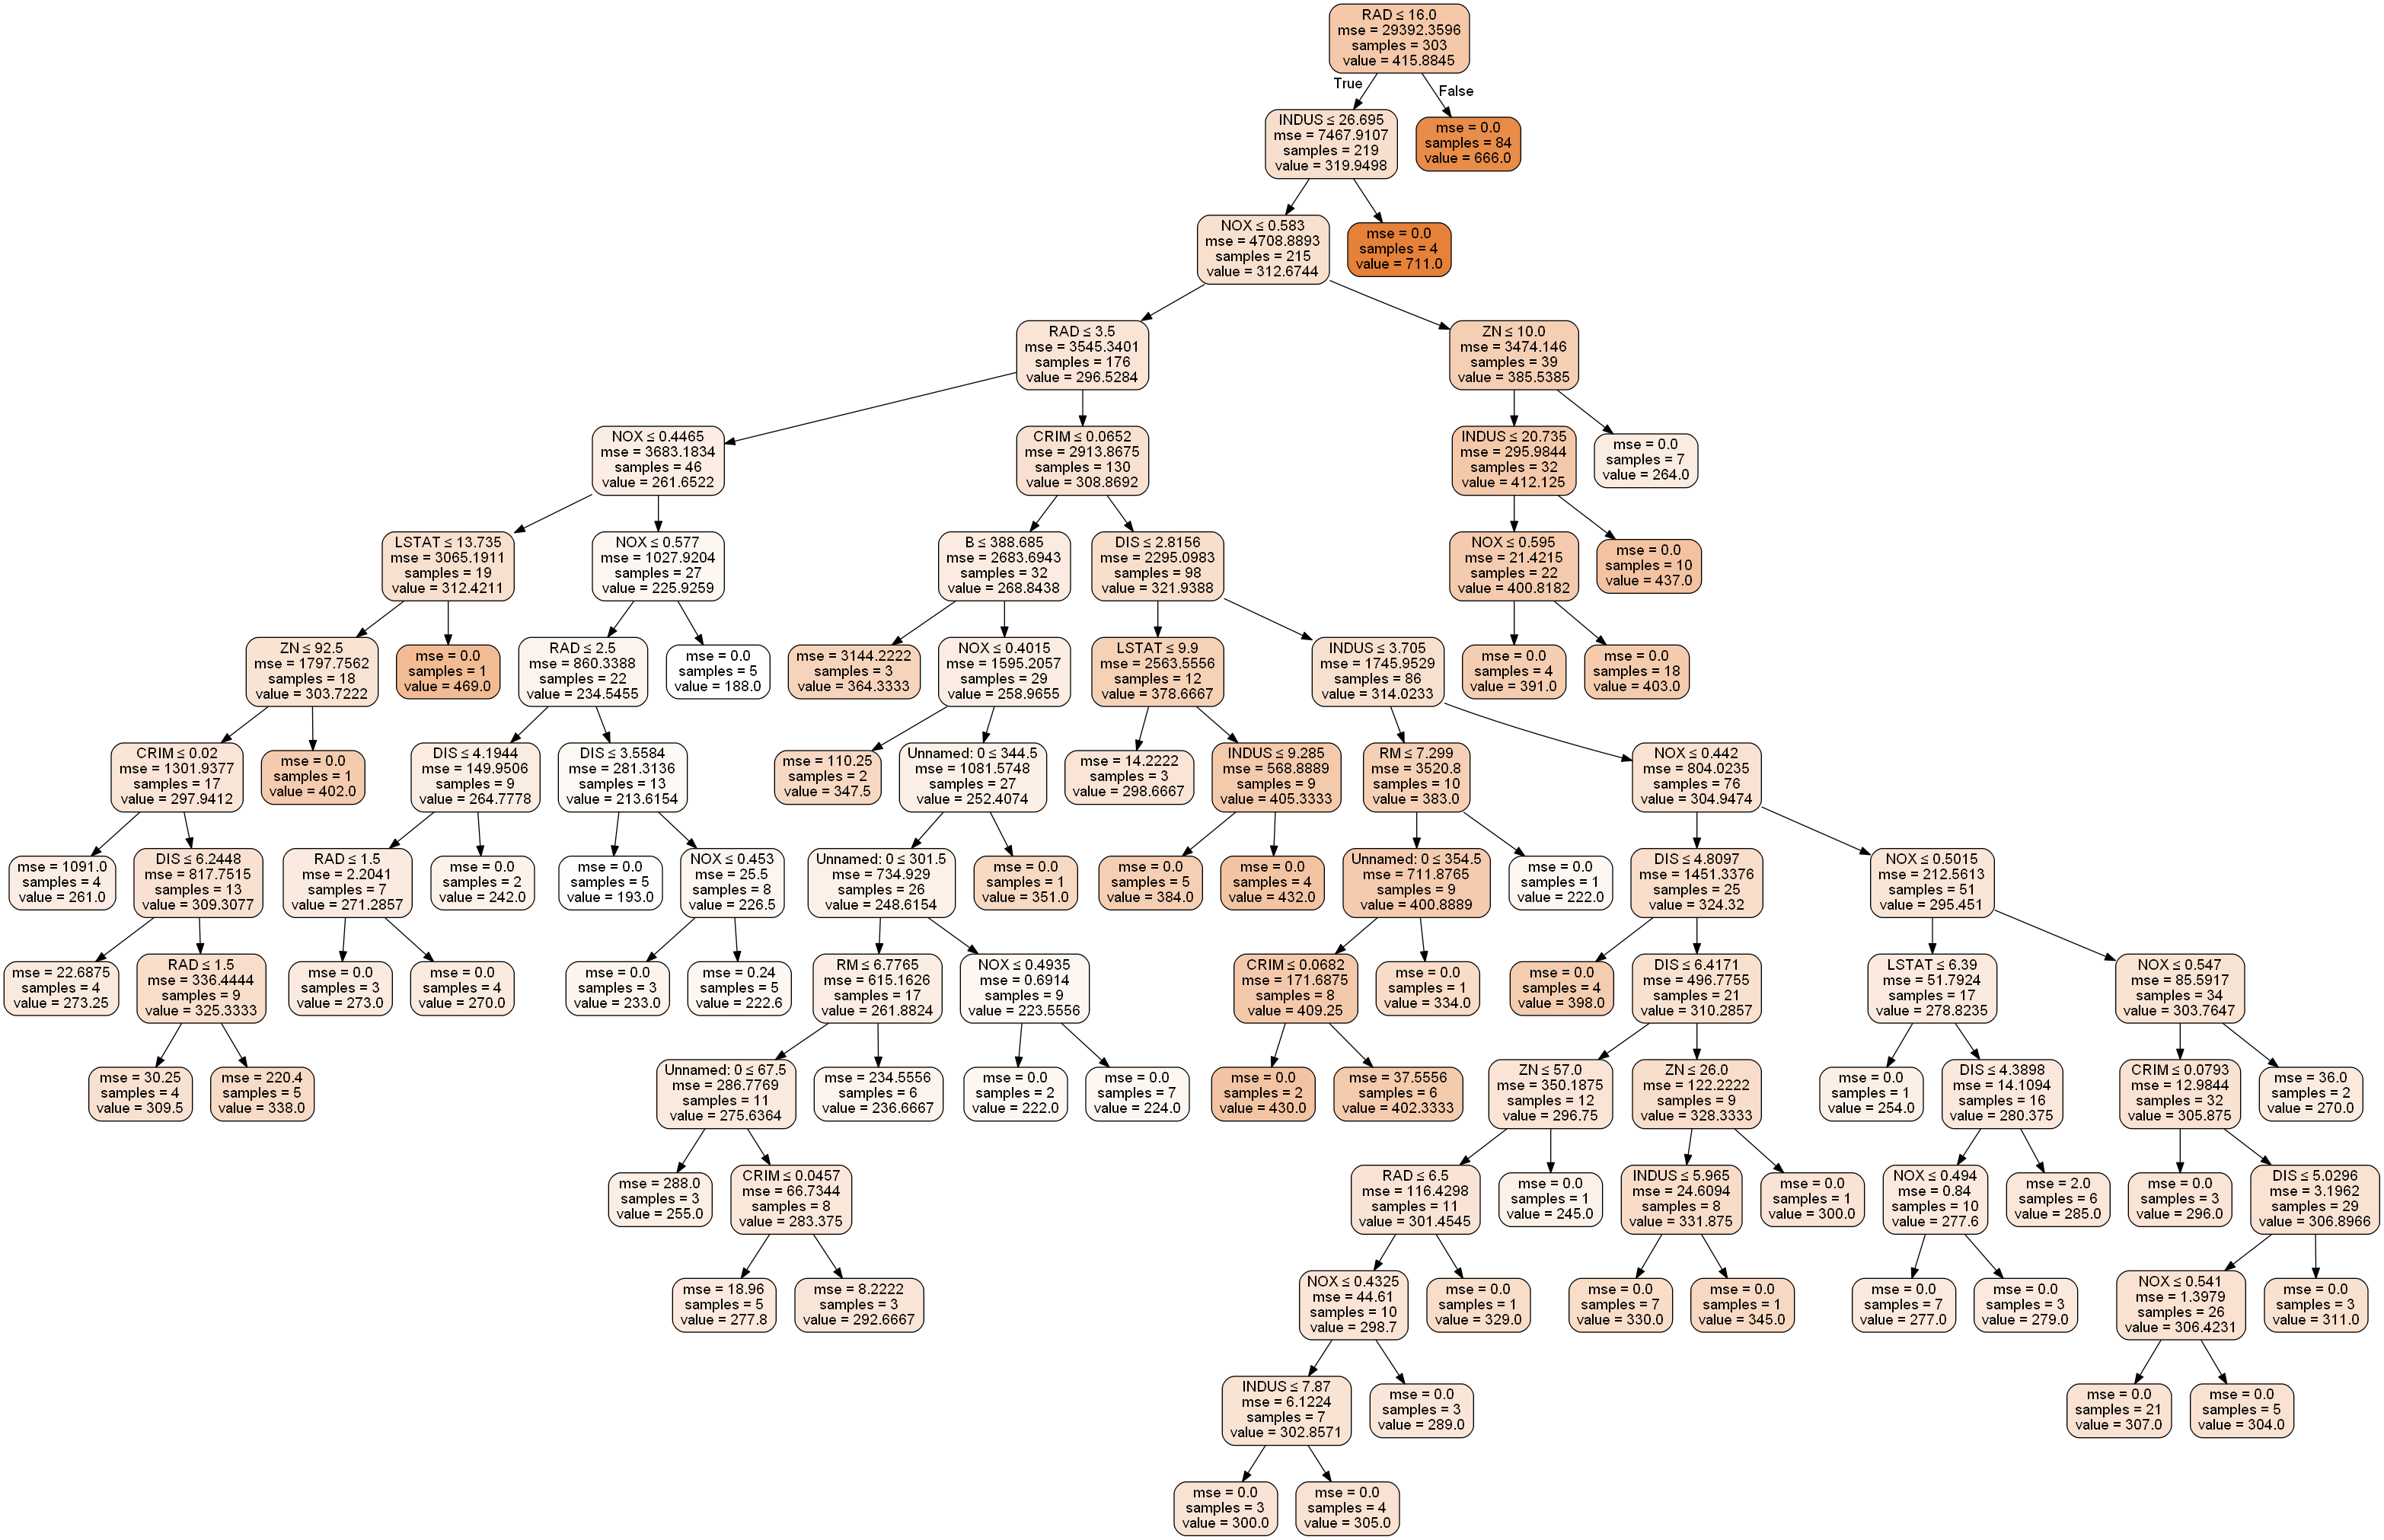

In [191]:
#Visualize your tree USING the "best" parameteres/estimators
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

dot_data = StringIO()
''' dtr_best was defined before in section B'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [192]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)


In [193]:
#Fit the Random forest tree model
estimator_rfr.fit(X_train, y_train)

#Print best estimator, best parameters, and best score (best fit to explain Y)
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''

rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.1min finished


best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=4, max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 4}


best score 0.90759901018


In [194]:
#Using the function defined in Simple Reg Tree to Print feature Importance
feature_importance(X, rfr_best)


,feature,importance
0,Unnamed: 0,0.282273
9,RAD,0.235926
1,CRIM,0.164572
3,INDUS,0.125637
5,NOX,0.093502
10,PTRATIO,0.054721
8,DIS,0.013190
13,MEDV,0.011548
7,AGE,0.007814
12,LSTAT,0.003366


In [195]:
#Predict on the Test Data
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr


array([ 289.16676518,  661.46998909,  666.6690239 ,  312.61098456,
        302.36584623,  376.49104019,  363.72374265,  303.27280973,
        283.34908296,  290.05615912,  294.14068708,  303.89767923,
        666.6690239 ,  382.72146129,  666.4185477 ,  321.7806657 ,
        300.61235721,  408.28923787,  291.35154332,  294.82863305,
        436.57666936,  292.73549292,  387.62154932,  647.55779743,
        666.4185477 ,  292.80855593,  316.23742789,  666.6690239 ,
        363.99966381,  294.38767364,  308.79732485,  666.6690239 ,
        302.52017472,  295.71921052,  300.95013795,  666.6690239 ,
        666.6690239 ,  298.01176158,  666.6690239 ,  306.85210528,
        308.04380046,  318.79502167,  310.2520232 ,  286.7112116 ,
        299.99911961,  295.61817497,  365.83483701,  666.4185477 ,
        378.27790292,  308.34795762,  663.9155239 ,  293.14646937,
        288.38957414,  313.29180095,  666.6690239 ,  299.45924929,
        305.80437089,  282.21592025,  299.0921102 ,  300.93373

In [196]:
#Evaluate the performance of your model (MSE in train and test data, R2 in train and test data) using function created above
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)


MSE Random Forest Regression tree train data: 1608.11, test data: 1852.08
R^2 Random Forest Regression tree train data: 0.95, test data: 0.93
